In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

### Description
This study presents an exploratory analysis of unemployment in India, focusing on how unemployment rates vary across regions and over time. Using available unemployment data, the analysis examines patterns at the state and regional level to understand the distribution and intensity of unemployment across the country.

The dataset captures unemployment rates for different Indian states and regions, allowing comparisons between areas with high, moderate, and low unemployment levels. Visualizations and summary statistics are used to highlight trends, fluctuations, and disparities, making it easier to observe how unemployment changes over different periods rather than remaining constant.

The analysis also emphasizes the uneven nature of employment opportunities in India, showing that some regions consistently face higher unemployment while others demonstrate relative stability. By breaking down unemployment geographically and temporally, the study provides a clear picture of where challenges are concentrated and helps set the foundation for policy-focused discussions and targeted interventions

In [20]:
df = pd.read_csv("Unemployment in India.csv")

In [21]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [22]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.shape

(768, 7)

In [24]:
df.columns = ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate',' Estimated Employed', ' Estimated Labour Participation Rate','Area']

In [25]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate',
       ' Estimated Employed', ' Estimated Labour Participation Rate', 'Area'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Region                                740 non-null    object 
 1    Date                                 740 non-null    object 
 2    Frequency                            740 non-null    object 
 3    Estimated Unemployment Rate          740 non-null    float64
 4    Estimated Employed                   740 non-null    float64
 5    Estimated Labour Participation Rate  740 non-null    float64
 6   Area                                  740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [27]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [28]:
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [29]:
df.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True


In [30]:
df.dtypes

Region                                   object
 Date                                    object
 Frequency                               object
 Estimated Unemployment Rate            float64
 Estimated Employed                     float64
 Estimated Labour Participation Rate    float64
Area                                     object
dtype: object

In [31]:
df.isnull().sum()

Region                                  28
 Date                                   28
 Frequency                              28
 Estimated Unemployment Rate            28
 Estimated Employed                     28
 Estimated Labour Participation Rate    28
Area                                    28
dtype: int64

In [32]:
df.isnull().sum()/len(df)*100

Region                                  3.645833
 Date                                   3.645833
 Frequency                              3.645833
 Estimated Unemployment Rate            3.645833
 Estimated Employed                     3.645833
 Estimated Labour Participation Rate    3.645833
Area                                    3.645833
dtype: float64

In [33]:
clean_df = df.dropna()

In [34]:
clean_df.isnull().sum()/len(clean_df)*100

Region                                  0.0
 Date                                   0.0
 Frequency                              0.0
 Estimated Unemployment Rate            0.0
 Estimated Employed                     0.0
 Estimated Labour Participation Rate    0.0
Area                                    0.0
dtype: float64

In [36]:
clean_df.columns = clean_df.columns.str.strip()

In [38]:
clean_df["Date"] = pd.to_datetime(
    clean_df["Date"],
    dayfirst=True,
    errors="coerce"
)

In [39]:
clean_df["Months"] = clean_df["Date"].dt.month

In [40]:
clean_df["Year"] = clean_df["Date"].dt.year

In [41]:
clean_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,Months,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,2019


In [42]:
E_rate = clean_df.groupby("Year")["Estimated Unemployment Rate"].mean()
E_rate

Year
2019     9.399047
2020    15.101581
Name: Estimated Unemployment Rate, dtype: float64

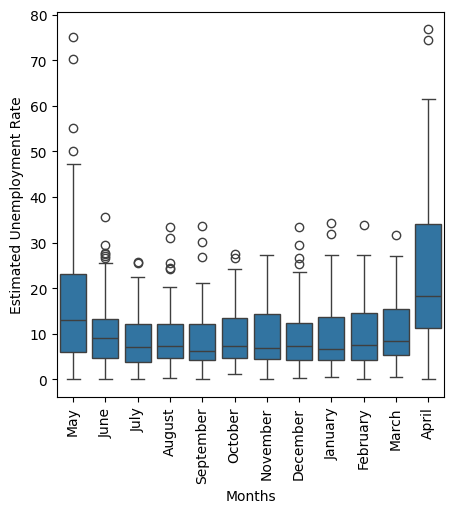

In [43]:
clean_df["Months"] = pd.to_datetime(clean_df["Date"]).dt.month_name()

plt.figure(figsize=(5,5))
sns.boxplot(x = "Months", y = "Estimated Unemployment Rate", data = clean_df,)
plt.xticks(rotation = 90)
plt.show()


### Insight from chart
The boxplot indicates that unemployment rates vary by month, showing a clear seasonal pattern with some months experiencing higher and more variable unemployment than others.


In [44]:
up_df = clean_df[clean_df["Region"] == "Uttar Pradesh"]
up_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,Months,Year
318,Uttar Pradesh,2019-05-31,Monthly,10.26,43287808.0,39.96,Rural,May,2019
319,Uttar Pradesh,2019-06-30,Monthly,11.13,42276572.0,39.32,Rural,June,2019
320,Uttar Pradesh,2019-07-31,Monthly,9.19,42697000.0,38.78,Rural,July,2019
321,Uttar Pradesh,2019-08-31,Monthly,11.47,43298746.0,40.24,Rural,August,2019
322,Uttar Pradesh,2019-09-30,Monthly,6.45,44198762.0,38.79,Rural,September,2019


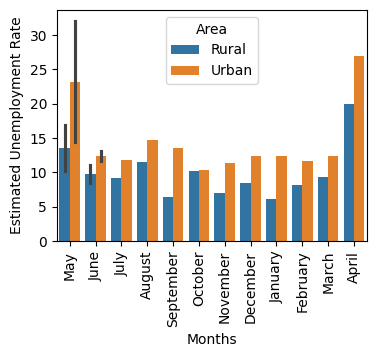

In [45]:
up_df.groupby("Months")["Estimated Unemployment Rate"].mean()
plt.figure(figsize = (4,3))
sns.barplot(x = "Months", y = "Estimated Unemployment Rate", data = up_df, hue = "   Area")
plt.xticks(rotation = 90)
plt.show()

### Insight from chart
The bar chart shows that **average unemployment rates vary across months and differ between areas, indicating both seasonal effects and regional disparities in employment**.


In [46]:
Uk_df = clean_df[clean_df["Region"] == "Uttarakhand"]
#Uk_df.head()

In [47]:
uk_year = Uk_df.groupby("Year")["Estimated Unemployment Rate"].mean()
uk_year

Year
2019    5.800625
2020    7.720909
Name: Estimated Unemployment Rate, dtype: float64

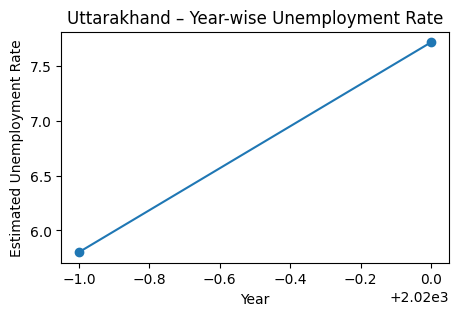

In [48]:
plt.figure(figsize=(5,3))
plt.plot(uk_year.index, uk_year.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Estimated Unemployment Rate")
plt.title("Uttarakhand – Year-wise Unemployment Rate")
plt.show()

### Insight from chart
The line chart shows that **Uttarakhand’s unemployment rate changes noticeably over the years, indicating periods of both rising and falling employment conditions rather than a steady trend**.


In [49]:
states = ["Uttar Pradesh", "Uttarakhand", "Delhi", "Haryana"]

In [50]:
states_df = clean_df[clean_df["Region"].isin(states)]

In [51]:
state_rate = states_df.groupby("Region")["Estimated Unemployment Rate"].mean()
state_rate

Region
Delhi            16.495357
Haryana          26.283214
Uttar Pradesh    12.551429
Uttarakhand       6.582963
Name: Estimated Unemployment Rate, dtype: float64

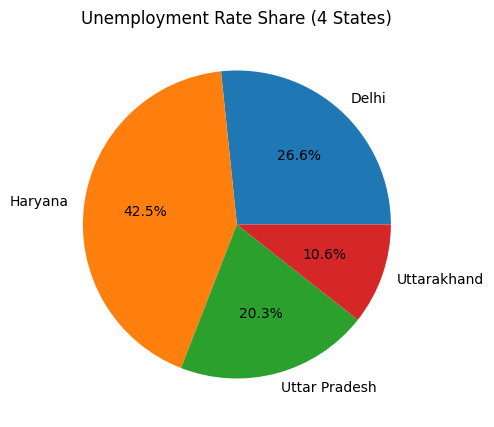

In [52]:
plt.figure(figsize=(5,5))
plt.pie(state_rate.values, labels=state_rate.index, autopct="%1.1f%%")
plt.title("Unemployment Rate Share (4 States)")
plt.show()

### Insight from chart
The pie chart shows that **unemployment is unevenly distributed across the four states, with some states contributing a larger share to overall unemployment than others**.


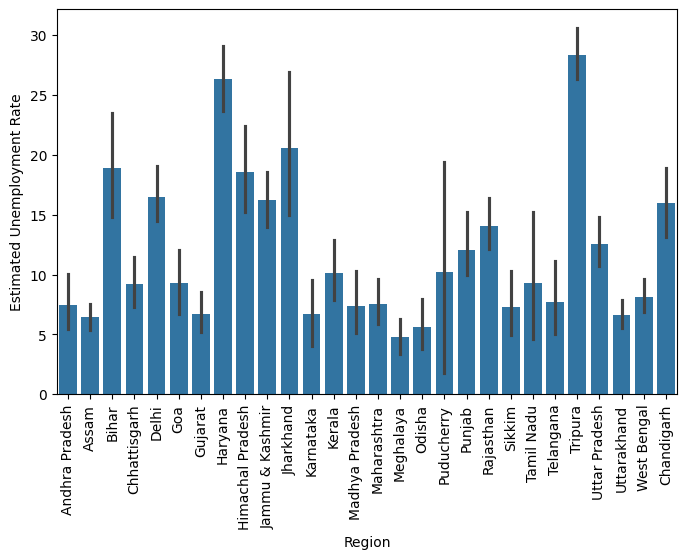

In [53]:
plt.figure(figsize = (8,5))
sns.barplot(x = "Region", y = "Estimated Unemployment Rate", data = clean_df)
plt.ylabel("Estimated Unemployment Rate")
plt.xlabel("Region")
plt.xticks(rotation = 90)
plt.show()    

### Insight from chart
The bar chart shows that **unemployment rates differ significantly across regions, highlighting clear regional disparities in employment conditions**.


### Conclusion
The analysis of unemployment in India highlights significant regional and temporal disparities in employment conditions. Unemployment rates vary widely across states and regions, indicating that economic opportunities are unevenly distributed. Some states consistently experience higher and more volatile unemployment, while others remain relatively stable.

The trends over time suggest that unemployment is not uniform or steadily improving, but instead fluctuates due to factors such as seasonal employment, regional economic structure, and local development levels. Certain regions contribute a disproportionately large share to overall unemployment, emphasizing the need for targeted, region-specific policy interventions rather than one-size-fits-all solutions.

Overall, the findings underscore that addressing unemployment in India requires focused regional strategies, skill development, and sustained economic planning to reduce disparities and improve employment stability nationwide.
